In [1]:
#import libraries that could be used
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, title, xlabel, ylabel, legend
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.neural_network import MLPClassifier
import numpy as np
import sklearn as sk
import random
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings


In [2]:
dataset = pd.read_csv('dataset.csv')
df = pd.DataFrame(dataset)
#import supplied dataset and put into dataframe

In [3]:
pandas_profiling.ProfileReport(df)
#show general report of dataset with many details

Number of variables,13
Number of observations,996
Total Missing (%),0.0%
Total size in memory,101.2 KiB
Average record size in memory,104.1 B
Numeric,12
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [4]:
pd.DataFrame.std(df)
#standard deviation

Power_range_sensor_1      2.764856
Power_range_sensor_2      2.312569
Power_range_sensor_3      2.532173
Power_range_sensor_4      4.354778
Pressure _sensor_1       11.680045
Pressure _sensor_2        2.126091
Pressure _sensor_3        2.526136
Pressure _sensor_4        4.165490
Vibration_sensor_1        6.173261
Vibration_sensor_2        7.336233
Vibration_sensor_3       12.159625
Vibration_sensor_4        7.282383
dtype: float64

In [5]:
pd.DataFrame.mean(df)
#mean

Power_range_sensor_1      4.999574
Power_range_sensor_2      6.379273
Power_range_sensor_3      9.228112
Power_range_sensor_4      7.355272
Pressure _sensor_1       14.199127
Pressure _sensor_2        3.077958
Pressure _sensor_3        5.749234
Pressure _sensor_4        4.997002
Vibration_sensor_1        8.164563
Vibration_sensor_2       10.001593
Vibration_sensor_3       15.187982
Vibration_sensor_4        9.933591
dtype: float64

In [6]:
pd.DataFrame.max(df)
#maximum values

Status                    Normal
Power_range_sensor_1     12.1298
Power_range_sensor_2     11.9284
Power_range_sensor_3     15.7599
Power_range_sensor_4     17.2359
Pressure _sensor_1       67.9794
Pressure _sensor_2       10.2427
Pressure _sensor_3       12.6475
Pressure _sensor_4       16.5556
Vibration_sensor_1       36.1864
Vibration_sensor_2       34.8676
Vibration_sensor_3       53.2384
Vibration_sensor_4       43.2314
dtype: object

In [7]:
pd.DataFrame.min(df)
# minimum values

Status                   Abnormal
Power_range_sensor_1       0.0082
Power_range_sensor_2       0.0403
Power_range_sensor_3      2.58397
Power_range_sensor_4       0.0623
Pressure _sensor_1         0.0248
Pressure _sensor_2       0.008262
Pressure _sensor_3       0.001224
Pressure _sensor_4         0.0058
Vibration_sensor_1              0
Vibration_sensor_2         0.0185
Vibration_sensor_3         0.0646
Vibration_sensor_4         0.0092
dtype: object

In [8]:
pd.DataFrame.count(df)
# how many values per feature

Status                   996
Power_range_sensor_1     996
Power_range_sensor_2     996
Power_range_sensor_3     996
Power_range_sensor_4     996
Pressure _sensor_1       996
Pressure _sensor_2       996
Pressure _sensor_3       996
Pressure _sensor_4       996
Vibration_sensor_1       996
Vibration_sensor_2       996
Vibration_sensor_3       996
Vibration_sensor_4       996
dtype: int64

In [9]:
df.size
#how many data points

12948

In [10]:
df.shape
# size of data

(996, 13)

In [11]:
df.isna().sum().sum()
#shows how many data entries are N/A (isna = is not applicable)
#sum returns a value for each feature, sum sum returns a single value

0

In [12]:
df.dtypes
# shows datatypes
#categorical variable indicated by object

Status                    object
Power_range_sensor_1     float64
Power_range_sensor_2     float64
Power_range_sensor_3     float64
Power_range_sensor_4     float64
Pressure _sensor_1       float64
Pressure _sensor_2       float64
Pressure _sensor_3       float64
Pressure _sensor_4       float64
Vibration_sensor_1       float64
Vibration_sensor_2       float64
Vibration_sensor_3       float64
Vibration_sensor_4       float64
dtype: object

In [13]:
df = shuffle(df)
#shuffle the dataset

In [14]:
df.loc[df['Status'] == 'Normal', 'Status'] = 1
df.loc[df['Status'] == 'Abnormal', 'Status'] = 0
#changes the columns to the status types 

In [15]:
names = df.columns
x = df.drop(['Status'], axis = 1) 
#ignore the status columns in the dataset
y = df['Status'] 

In [16]:
x_normalised = StandardScaler().fit_transform(x)
x.head()
#normalise data

,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
477,10.310700,7.558600,9.02530,13.995700,12.596100,8.495200,10.090500,15.108500,0.987800,11.50250,1.938600,12.213400
356,6.245700,7.137400,6.81430,13.770400,35.586600,5.496600,4.925600,9.910100,25.636100,5.11430,0.498500,9.610100
402,10.684200,5.396100,11.19510,9.129600,8.827200,5.769400,4.203100,2.899200,8.982300,2.15100,6.600600,11.419500
810,1.808868,2.425152,5.49372,1.832226,20.566974,1.123632,5.573586,1.406682,23.069646,10.96041,17.617746,10.819242
366,7.478000,7.484400,5.88680,12.916300,4.502900,3.154600,5.672300,7.877900,10.597800,8.11450,8.437700,14.188900


Text(0, 0.5, 'Vibration_sensor_1')

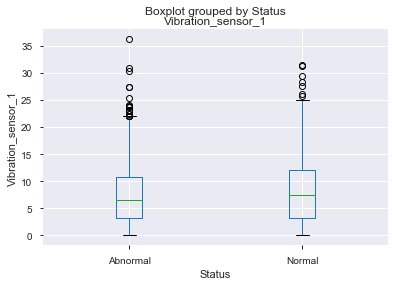

In [17]:
%matplotlib inline
#use inline lib to show boxplot
dataset.boxplot(column = ['Vibration_sensor_1'], by = 'Status')
# generates boxplot using specified column
# status gives both types of data (normal/abnormal)
ylabel('Vibration_sensor_1')
#labels the y axis 

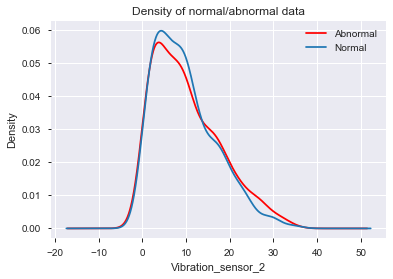

In [18]:
%matplotlib inline
#sns.kdeplot(x, shade = True)
df[df['Status'] == 0]['Vibration_sensor_2'].plot(kind = 'density', label = 'Abnormal', colormap ='autumn')
df[df['Status'] == 1]['Vibration_sensor_2'].plot(kind = 'density', label = 'Normal')
# gets status 0 and 1 which represent the normal and abnormal data
xlabel('Vibration_sensor_2')
# labels the x axis
grid = True
title('Density of normal/abnormal data')
# add title for clarity
legend()
# add legend to show which plot line is which


In [19]:
#section 1 above












#section3 below

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
#splits the data

In [21]:
#neural network function
def neuralnetwork(X_train, X_test, y_train, y_test):
    
    ann = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (500, 500), solver = 'adam', random_state = 1, max_iter=20)
    #activation = logistic gives sigmoid function
    #set both hidden layers
    #add/change max_iters to set epoch amount
    ann.fit(X_train, y_train)
    #fits the model to data
    return ann.score(X_test, y_test)

print(neuralnetwork(X_train, X_test, y_train, y_test))
#show accuracy result

0.65


C:\Users\tomke\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
#random forest classifier
def rfc(X_train, X_test, y_train, y_test):
    minSamples = [50]
    # sets minimum number of leaf node samples
    for i in range(0,len(minSamples)):
        clf = RandomForestClassifier(min_samples_leaf=minSamples[i])
        randomForest = RandomForestClassifier(min_samples_leaf = minSamples[i], n_estimators = 100, random_state = 1)
        #n estimators sets number of trees
        randomForest.fit(X_train, y_train)
        #fits the model to data
        return randomForest.score(X_test, y_test)
print('Accuracy:', rfc(X_train, X_test, y_train, y_test))
#show accuracy result

Accuracy: 0.78


In [24]:
#section 3 above












#section 4 below

In [28]:
#cross validation method
crossv = KFold(n_splits = 10, random_state = 1) 
# splits is the number of folds

filterwarnings('ignore')

In [26]:
#show accuracy results for neural network
neurons = 1000
#set neuron amount
neuralnetworkcv = cross_val_score(MLPClassifier\
(activation = 'logistic', hidden_layer_sizes = (neurons,neurons), solver ='adam', random_state = 1), x_normalised, y, cv = crossv)
print('Mean accuracy: {1}'.format(neurons, neuralnetworkcv.mean()))
#display result

Mean accuracy: 0.6938888888888888


In [31]:
# show accuracy results for random forest classifier
trees = 10000
#set tree amount
rfccv = cross_val_score(RandomForestClassifier(n_estimators = trees, random_state = 1), x_normalised, y, cv = crossv)
print('Mean accuracy: {1}'.format(trees, rfccv.mean()))
#display results

Mean accuracy: 0.9276565656565655
